# PERCEPTRON LEANRNING ALGORITHM IMPLMENTATION

In [1]:
import sklearn as skl
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
data=pd.read_csv("water_potability.csv")

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.shape

(3276, 10)

#### DATA PREPROCESSING

In [6]:
data.ph.isnull().sum()

491

In [7]:
data.Sulfate.isnull().sum()

781

In [8]:
data.Trihalomethanes.isnull().sum()

162

In [9]:
ph_mean=data.ph.mean()
Sulfate_mean=data.Sulfate.mean()
Trihalomethanes_mean=data.Trihalomethanes.mean()
data.ph.fillna(ph_mean,inplace=True)
data.Sulfate.fillna(Sulfate_mean,inplace=True)
data.Trihalomethanes.fillna(Trihalomethanes_mean,inplace=True)

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [12]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
data.corr()['Potability']

ph                -0.003287
Hardness          -0.013837
Solids             0.033743
Chloramines        0.023779
Sulfate           -0.020619
Conductivity      -0.008128
Organic_carbon    -0.030001
Trihalomethanes    0.006960
Turbidity          0.001581
Potability         1.000000
Name: Potability, dtype: float64

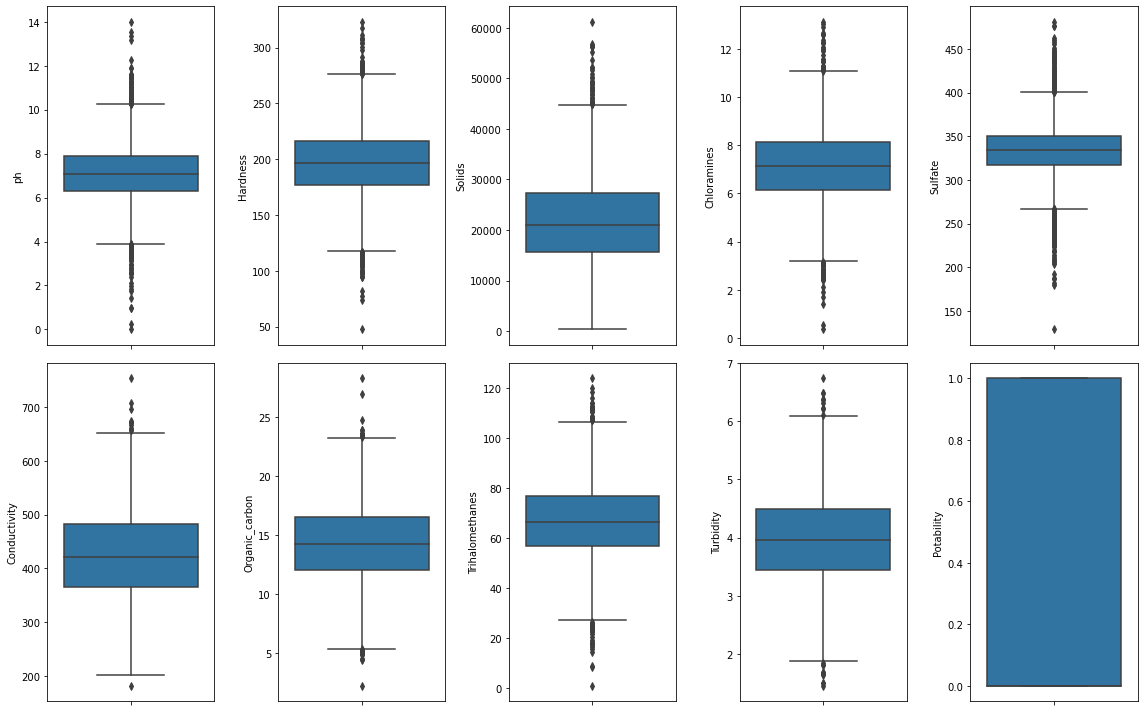

In [14]:
def box_plot():
    features = data.columns.tolist()

    plt.figure(figsize=(16,10))

    for i,col in enumerate(features):    
        plt.subplot(2,5,i + 1)
        sns.boxplot(y=col, data=data)
        #plt.ylabel('')

    plt.tight_layout()

    plt.show()
    
box_plot()

<!-- 
# for i in features:
#         Q3,Q1 = np.percentile(data, [75 ,25])
#         IQR = Q3 - Q1
#         low_lim = Q1 - 1.5 * IQR
#         up_lim = Q3 + 1.5 * IQR
#         dat=data[(data[i]>low_lim) & (data[i]<up_lim)]
# dat      
   
# features = data.columns.tolist()

# plt.figure(figsize=(16,10))

# for i,col in enumerate(features):    
#     plt.subplot(2,5,i + 1)
#     sns.boxplot(y=col, data=data)
#     #plt.ylabel('')

# plt.tight_layout()

# plt.show()-->

In [15]:
data=data[(data['ph']> 2) &(data['ph'] < 13)]
data=data[(data['Hardness']> 100) &(data['Hardness'] < 300)]
data=data[(data['Solids'] < 55000)]
data=data[(data['Chloramines']> 3) &(data['Chloramines'] < 13)]
data=data[(data['Sulfate']> 250) &(data['Sulfate'] < 430)]
data=data[(data['Conductivity']> 200) &(data['Conductivity'] < 700)]
data=data[(data['Organic_carbon']> 3) &(data['Organic_carbon'] <25)]
data=data[(data['Trihalomethanes']> 10) &(data['Trihalomethanes'] < 115)]
data=data[(data['Turbidity']> 2) &(data['Turbidity'] < 7)]

In [16]:
# data=data[(data['ph']> 2) &(data['ph'] < 13)]
# data=data[(data['Hardness']> 100) &(data['Hardness'] < 300)]
# data=data[(data['Solids'] < 55000)]
# data=data[(data['Chloramines']> 3) &(data['Chloramines'] < 13)]
# data=data[(data['Sulfate']> 250) &(data['Sulfate'] < 430)]
# data=data[(data['Conductivity']> 200) &(data['Conductivity'] < 700)]
# data=data[(data['Organic_carbon']> 3) &(data['Organic_carbon'] <25)]
# data=data[(data['Trihalomethanes']> 10) &(data['Trihalomethanes'] < 115)]
# data=data[(data['Turbidity']> 2) &(data['Turbidity'] < 7)]

In [17]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


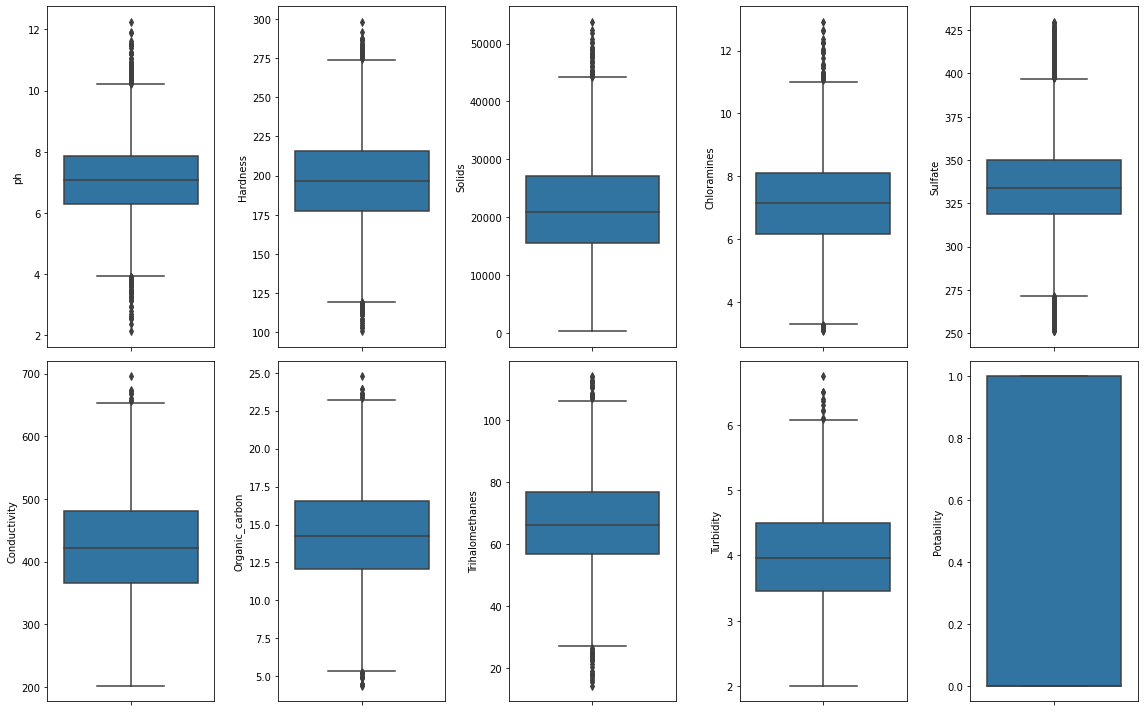

In [18]:
box_plot()

In [19]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [20]:
train= data.drop(columns=['Potability'])
test= data['Potability']
   

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(
        train, test, test_size=0.2, random_state=85
    )

In [22]:
model=Perceptron(eta0=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("Accuracy(%):  ",accuracy_score(y_test,prediction)*100)

Accuracy(%):   63.2258064516129


In [23]:
confusion_matrix(y_test, prediction)

array([[392,   0],
       [228,   0]], dtype=int64)

In [24]:
print(skl.metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       392
           1       0.00      0.00      0.00       228

    accuracy                           0.63       620
   macro avg       0.32      0.50      0.39       620
weighted avg       0.40      0.63      0.49       620



C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91906\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
np.unique(prediction)

array([0], dtype=int64)

In [26]:
np.unique(y_test)

array([0, 1], dtype=int64)

In [27]:
np.unique(y_train.values)

array([0, 1], dtype=int64)

#### Decision Tree classifier
##### just to check accuracy using another algorithm

In [30]:
from sklearn import tree
m=tree.DecisionTreeClassifier()
m.fit(X_train,y_train)
pred=m.predict(X_test)
confusion_matrix(y_test, pred)
print("ACCURACY :")
m.score(X_test,y_test)*100

ACCURACY :


54.35483870967742